In [2]:
import pandas as pd
data = pd.read_csv('AAPL_historical_data.csv')
print(data.head())
print(data.info())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10998 non-null  object 
 1   Open          10998 non-null  float64
 2   High          10998 non-null  float64
 3   Low           10998 non

In [ ]:
import pandas as pd

data = pd.read_csv('AAPL_historical_data.csv')

# claculate simple moving average
data["SMA_20"] = data["Close"].rolling(window=20).mean()


In [6]:
# calculate exponential moving average
data["EMA_20"] = data["Close"].ewm(span=20, adjust=False).mean()

In [7]:
# calculate daily price changes
delta = data["Close"].diff()

# calculate gaines and losses
gain = delta.where(delta > 0, 0)
loss = delta.where(delta < 0, 0)

# calculate average gains and lossess
window_length = 14
avg_gain = gain.rolling(window=window_length, min_periods=1).mean()
avg_loss = loss.rolling(window=window_length, min_periods=1).mean()

# calculate relative strength index
rs = avg_gain / avg_loss
data["RSI_14"] = 100 - (100 / (1 + rs))

In [10]:
# calculate moving average convergence divergence
ema_fast = data["Close"].ewm(span=12, adjust=False).mean()
ema_slow = data["Close"].ewm(span=26, adjust=False).mean()

data["MACD"] = ema_fast - ema_slow
data["MACD_Signal"] = data["MACD"].ewm(span=9, adjust=False).mean()
data["MACD_Hist"] = data["MACD"] - data["MACD_Signal"]

In [12]:
# display the updated dataset with the technical indicators
print(data[["Date", "Close", "SMA_20", "EMA_20", "RSI_14", "MACD", "MACD_Signal", "MACD_Hist"]].head())

         Date     Close  SMA_20    EMA_20     RSI_14      MACD  MACD_Signal  \
0  1980-12-12  0.128348     NaN  0.128348        NaN  0.000000     0.000000   
1  1980-12-15  0.121652     NaN  0.127710   0.000000 -0.000534    -0.000107   
2  1980-12-16  0.112723     NaN  0.126283   0.000000 -0.001659    -0.000417   
3  1980-12-17  0.115513     NaN  0.125257 -21.737417 -0.002299    -0.000793   
4  1980-12-18  0.118862     NaN  0.124648 -64.716523 -0.002506    -0.001136   

   MACD_Hist  
0   0.000000  
1  -0.000427  
2  -0.001242  
3  -0.001505  
4  -0.001370  


In [13]:
import pandas as pd
data = pd.read_csv('AMZN_historical_data.csv')
print(data.head())
print(data.info())

# claculate simple moving average
data["SMA_20"] = data["Close"].rolling(window=20).mean()

# calculate exponential moving average
data["EMA_20"] = data["Close"].ewm(span=20, adjust=False).mean()

# calculate daily price changes
delta = data["Close"].diff()

# calculate gaines and losses
gain = delta.where(delta > 0, 0)
loss = delta.where(delta < 0, 0)

# calculate average gains and lossess
window_length = 14
avg_gain = gain.rolling(window=window_length, min_periods=1).mean()
avg_loss = loss.rolling(window=window_length, min_periods=1).mean()

# calculate relative strength index
rs = avg_gain / avg_loss
data["RSI_14"] = 100 - (100 / (1 + rs))

# calculate moving average convergence divergence
ema_fast = data["Close"].ewm(span=12, adjust=False).mean()
ema_slow = data["Close"].ewm(span=26, adjust=False).mean()

data["MACD"] = ema_fast - ema_slow
data["MACD_Signal"] = data["MACD"].ewm(span=9, adjust=False).mean()
data["MACD_Hist"] = data["MACD"] - data["MACD_Signal"]

# display the updated dataset with the technical indicators
print(data[["Date", "Close", "SMA_20", "EMA_20", "RSI_14", "MACD", "MACD_Signal", "MACD_Hist"]].head())

         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3  1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
4  1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6846 entries, 0 to 6845
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6846 non-null   object 
 1   Open          6846 non-null   float64
 2   High          6846 non-null   float64
 3   Low           6846 

In [15]:
import pandas as pd

data = pd.read_csv('AAPL_historical_data.csv')

# stochastic oscillator
data["14-high"] = data["High"].rolling(window=14).max()
data["14-low"] = data["Low"].rolling(window=14).min()
data["%k"] = (data["Close"] - data["14-low"]) / (data["14-high"] - data["14-low"]) * 100
data["%D"] = data["%k"].rolling(window=3).mean()

print(data[["Date", "Close", "14-high", "14-low", "%k", "%D"]].head(20))

          Date     Close   14-high    14-low         %k         %D
0   1980-12-12  0.128348       NaN       NaN        NaN        NaN
1   1980-12-15  0.121652       NaN       NaN        NaN        NaN
2   1980-12-16  0.112723       NaN       NaN        NaN        NaN
3   1980-12-17  0.115513       NaN       NaN        NaN        NaN
4   1980-12-18  0.118862       NaN       NaN        NaN        NaN
5   1980-12-19  0.126116       NaN       NaN        NaN        NaN
6   1980-12-22  0.132254       NaN       NaN        NaN        NaN
7   1980-12-23  0.137835       NaN       NaN        NaN        NaN
8   1980-12-24  0.145089       NaN       NaN        NaN        NaN
9   1980-12-26  0.158482       NaN       NaN        NaN        NaN
10  1980-12-29  0.160714       NaN       NaN        NaN        NaN
11  1980-12-30  0.156808       NaN       NaN        NaN        NaN
12  1980-12-31  0.152344       NaN       NaN        NaN        NaN
13  1981-01-02  0.154018  0.161272  0.112723  85.058387       

In [16]:
# check for NaN values in the calculated columns
print(data[["%k", "%D"]].isna().sum())

%k    13
%D    15
dtype: int64


In [17]:
# display  the last few rows
print(data[["Date", "Close", "14-high", "14-low", "%k", "%D"]].tail())

             Date       Close     14-high      14-low         %k         %D
10993  2024-07-24  218.539993  237.229996  217.130005   7.014871  26.636056
10994  2024-07-25  217.490005  237.229996  214.619995  12.693544  17.521847
10995  2024-07-26  217.960007  237.229996  214.619995  14.772276  11.493563
10996  2024-07-29  218.240005  237.229996  214.619995  16.010660  14.492160
10997  2024-07-30  218.800003  237.229996  214.619995  18.487430  16.423455


In [20]:
# calculate average true range
data["TR"] = data[["High", "Low", "Close"]].max(axis=1) - data[["High", "Low", "Close"]].min(axis=1)
data["ATR"] = data["TR"].rolling(window=14).mean()

# track the highest high and lowest low over a specified period
data["Donchian_Upper"] = data["High"].rolling(window=20).max()
data["Donchian_Lower"] = data["Low"].rolling(window=20).min()

print(data[["Date", "High", "Low", "Close", "TR", "ATR", "Donchian_Upper", "Donchian_Lower"]].head(20))

          Date      High       Low     Close        TR       ATR  \
0   1980-12-12  0.128906  0.128348  0.128348  0.000558       NaN   
1   1980-12-15  0.122210  0.121652  0.121652  0.000558       NaN   
2   1980-12-16  0.113281  0.112723  0.112723  0.000558       NaN   
3   1980-12-17  0.116071  0.115513  0.115513  0.000558       NaN   
4   1980-12-18  0.119420  0.118862  0.118862  0.000558       NaN   
5   1980-12-19  0.126674  0.126116  0.126116  0.000558       NaN   
6   1980-12-22  0.132813  0.132254  0.132254  0.000559       NaN   
7   1980-12-23  0.138393  0.137835  0.137835  0.000558       NaN   
8   1980-12-24  0.145647  0.145089  0.145089  0.000558       NaN   
9   1980-12-26  0.159040  0.158482  0.158482  0.000558       NaN   
10  1980-12-29  0.161272  0.160714  0.160714  0.000558       NaN   
11  1980-12-30  0.157366  0.156808  0.156808  0.000558       NaN   
12  1980-12-31  0.152902  0.152344  0.152344  0.000558       NaN   
13  1981-01-02  0.155134  0.154018  0.154018  0.

In [21]:
# Check for NaN values in the calculated columns
print(data[["ATR", "Donchian_Upper", "Donchian_Lower"]].isna().sum())


ATR               13
Donchian_Upper    19
Donchian_Lower    19
dtype: int64


In [22]:
# Display last few rows of the calculated columns
print(data[["Date", "High", "Low", "Close", "ATR", "Donchian_Upper", "Donchian_Lower"]].tail())


             Date        High         Low       Close       ATR  \
10993  2024-07-24  224.800003  217.130005  218.539993  4.860717   
10994  2024-07-25  220.850006  214.619995  217.490005  4.962860   
10995  2024-07-26  219.490005  216.009995  217.960007  4.882860   
10996  2024-07-29  219.300003  215.750000  218.240005  4.920004   
10997  2024-07-30  220.330002  216.119995  218.800003  4.947147   

       Donchian_Upper  Donchian_Lower  
10993      237.229996      210.300003  
10994      237.229996      210.300003  
10995      237.229996      210.300003  
10996      237.229996      211.919998  
10997      237.229996      214.619995  


In [24]:
# measure overbought/oversold levels
data["Williams_%R"] = (data["High"].rolling(window=14).max() - data["Close"]) /  (data["High"].rolling(window=14).max() - data["Low"].rolling(window=14).min()) * -100
print(data[["Date", "High", "Low", "Close", "Williams_%R"]].head(20)) 

          Date      High       Low     Close  Williams_%R
0   1980-12-12  0.128906  0.128348  0.128348          NaN
1   1980-12-15  0.122210  0.121652  0.121652          NaN
2   1980-12-16  0.113281  0.112723  0.112723          NaN
3   1980-12-17  0.116071  0.115513  0.115513          NaN
4   1980-12-18  0.119420  0.118862  0.118862          NaN
5   1980-12-19  0.126674  0.126116  0.126116          NaN
6   1980-12-22  0.132813  0.132254  0.132254          NaN
7   1980-12-23  0.138393  0.137835  0.137835          NaN
8   1980-12-24  0.145647  0.145089  0.145089          NaN
9   1980-12-26  0.159040  0.158482  0.158482          NaN
10  1980-12-29  0.161272  0.160714  0.160714          NaN
11  1980-12-30  0.157366  0.156808  0.156808          NaN
12  1980-12-31  0.152902  0.152344  0.152344          NaN
13  1981-01-02  0.155134  0.154018  0.154018   -14.941613
14  1981-01-05  0.151228  0.150670  0.150670   -21.837724
15  1981-01-06  0.144531  0.143973  0.143973   -35.632062
16  1981-01-07

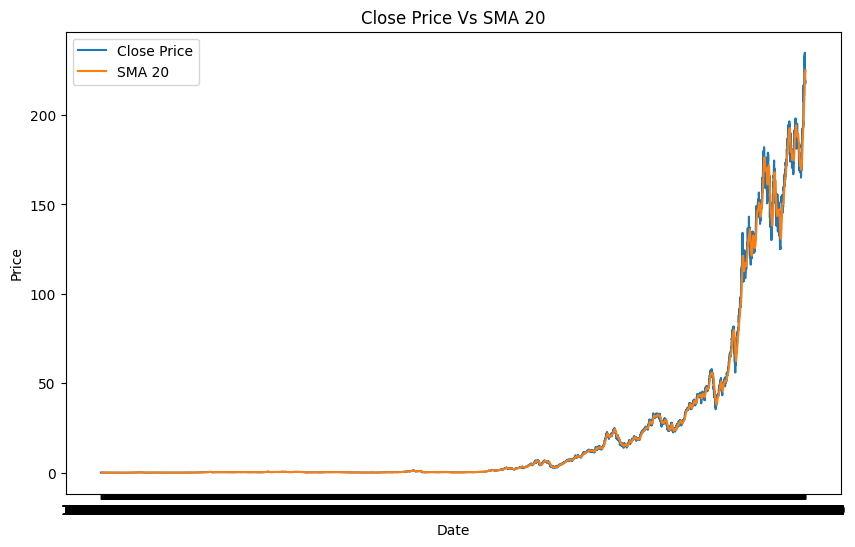

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('AAPL_historical_data.csv')

data["SMA_20"] = data["Close"].rolling(window=20).mean()
# plot close price and SMA
plt.figure(figsize=(10, 6))
plt.plot(data["Date"], data["Close"], label="Close Price")
plt.plot(data["Date"], data["SMA_20"], label="SMA 20")
plt.legend()
plt.title("Close Price Vs SMA 20")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [4]:
import pandas as pd
import yfinance as yf

# Get historical data for Apple stock
data = yf.download("AAPL", start="2023-01-01", end="2024-01-01")
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-01-03  123.768463  125.070000  130.899994  124.169998  130.279999   
2023-01-04  125.045052  126.360001  128.660004  125.080002  126.889999   
2023-01-05  123.718979  125.019997  127.769997  124.760002  127.129997   
2023-01-06  128.271133  129.619995  130.289993  124.889999  126.010002   
2023-01-09  128.795609  130.149994  133.410004  129.889999  130.470001   

Price          Volume  
Ticker           AAPL  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  
